<a href="https://colab.research.google.com/github/SWJongMinHONG/Machine-learning/blob/main/20230417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

심층 신경망으로 이미지 분류

1.이미지 데이터셋 로드
2.이미지 데이터 정규화: 수렴속도 증가
3.DenseLayer 에 입력하기 위한 차원축소:reshape().shape
4.모델 생성(DenseLayer(노드수, 활성화 함수)
5.complie():컴파일(옵티마이저,손실함수,ㅍ)
fit(): 훈련
예측
 검증

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

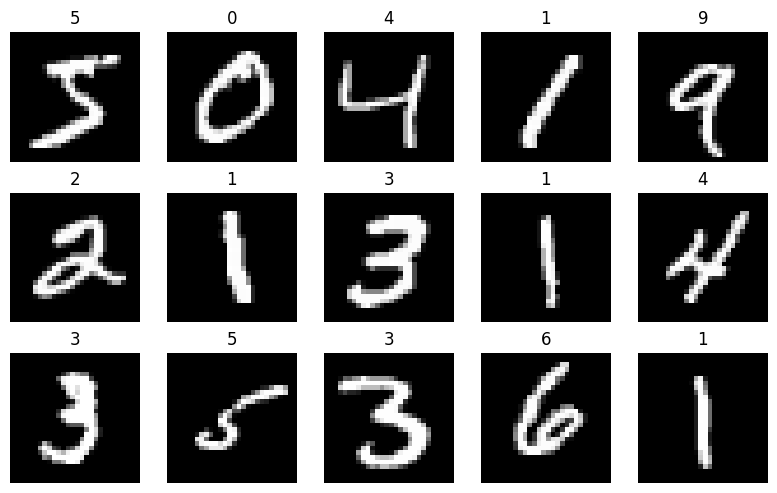

In [ ]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show


In [ ]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
x_train_n = x_train/x_train.max()

In [ ]:
x_train_n[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [ ]:
x_train.reshape(60000,-1).shape

(60000, 784)

In [ ]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

In [ ]:
tf.keras.layers.Dense(128,activation='relu')

In [ ]:
tf.keras.layers.Dense(1, activation = 'sigmoid')

In [ ]:
tf.keras.layers.Dense(10, activation = 'softmax')

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')])

In [ ]:
model.compile(loss = 'categorical_crossentropy')

In [ ]:
model.compile(loss = 'binary_crossentropy')

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy')

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

model.compile(optimizer='adam')

In [ ]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer =adam, loss = 'sparse_categorical_crossentropy', metrics = [acc])

In [ ]:
model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs =10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.9322 - val_loss: 0.2040 - val_sparse_categorical_accuracy: 0.9450
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1663 - val_sparse_categorical_accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.1579 - val_sparse_categorical_accuracy: 0.9542
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1182 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.1575 - val_sparse_categorical_accuracy: 0.9587
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.1362 - val_sparse_categorical_accuracy: 0.9624
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - spars

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9757


[0.10899408161640167, 0.9757000207901001]

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9757
검증셋 정확도: 0.9757000207901001


In [ ]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.4305509e-13, 5.7676698e-07, 4.9033233e-10, 9.6911990e-10,
       2.0033360e-17, 1.3444844e-16, 0.0000000e+00, 9.9997914e-01,
       2.5968910e-12, 2.0212492e-05], dtype=float32)

In [ ]:
predictions[0].max()

0.99997914

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx],np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

<function matplotlib.pyplot.show(close=None, block=None)>

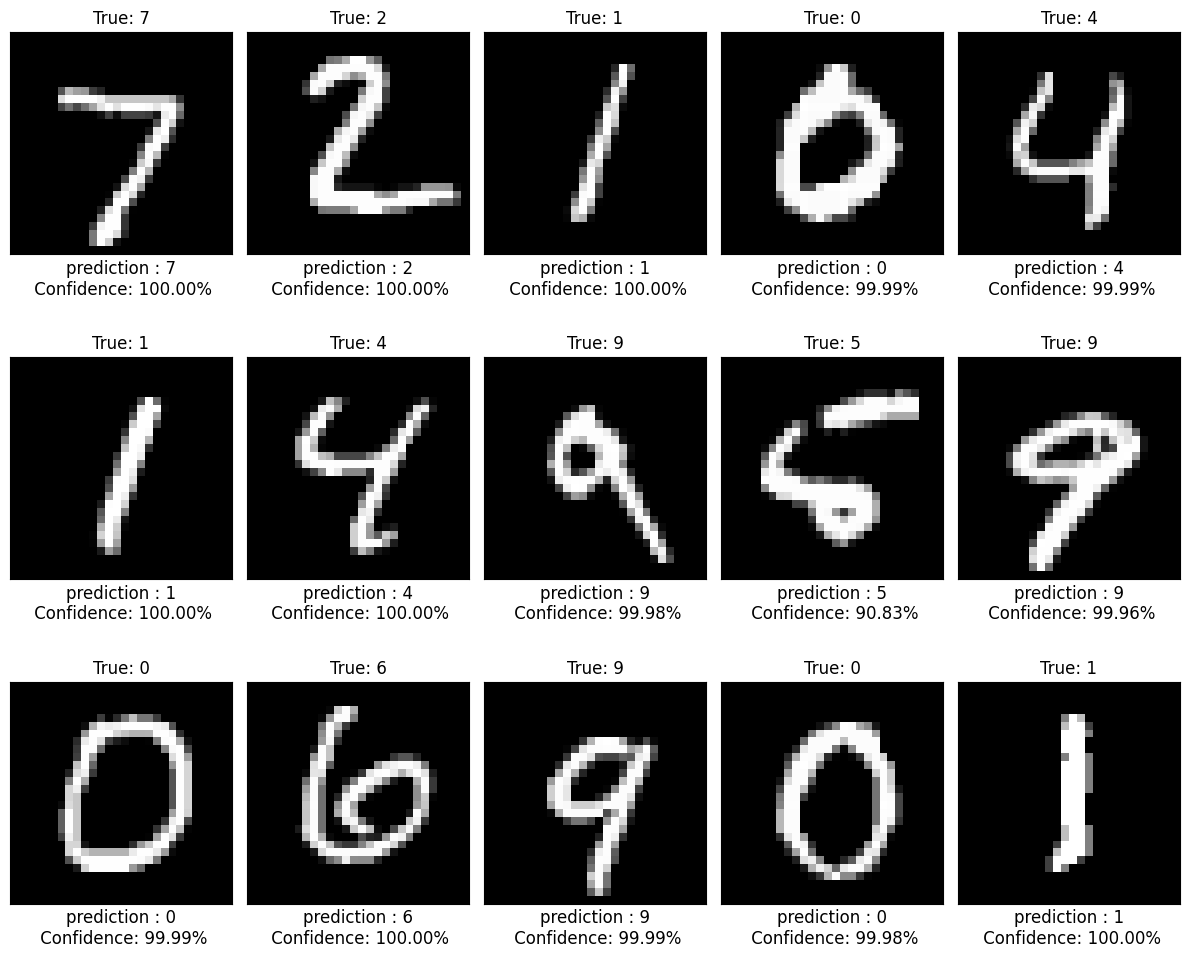

In [ ]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  ax.imshow(img , cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}', fontsize = 12)
  ax.set_xlabel(f'prediction : {y_pred}\n Confidence: {confidence:.2f}%', fontsize = 12)

plt.tight_layout()
plt.show

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
model = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [4]:
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform',activation='relu')

In [5]:
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal',activation='relu')

In [6]:
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal',activation='relu')

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 1.7536 - accuracy: 0.7397 - val_loss: 0.4942 - val_accuracy: 0.8712
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4055 - accuracy: 0.8937 - val_loss: 0.4062 - val_accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2773 - accuracy: 0.9256 - val_loss: 0.2453 - val_accuracy: 0.9421
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2041 - accuracy: 0.9441 - val_loss: 0.2430 - val_accuracy: 0.9385
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1774 - accuracy: 0.9519 - val_loss: 0.1864 - val_accuracy: 0.9513
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1530 - accuracy: 0.9577 - val_loss: 0.1857 - val_accuracy: 0.9543
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1378 - accuracy: 0.9619 - val_loss: 0.1802 - val_accuracy

In [8]:
model_w_he = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, kernel_initializer = 'he_normal', activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_w_he.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9285 - accuracy: 0.7845 - val_loss: 0.5051 - val_accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4197 - accuracy: 0.8955 - val_loss: 0.3977 - val_accuracy: 0.9080
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3215 - accuracy: 0.9166 - val_loss: 0.3243 - val_accuracy: 0.9226
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9290 - val_loss: 0.2908 - val_accuracy: 0.9275
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2367 - accuracy: 0.9373 - val_loss: 0.2235 - val_accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2043 - accuracy: 0.9441 - val_loss: 0.2239 - val_accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1811 - accuracy: 0.9501 - val_loss: 0.1920 - val_accuracy:

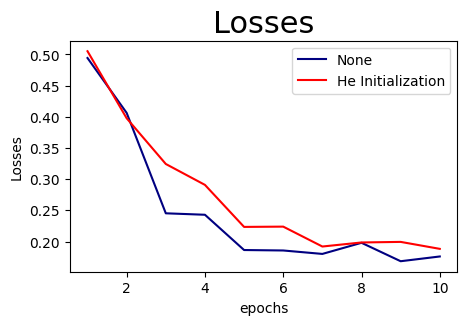

In [10]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'red', label = 'He Initialization')
plt.title("Losses", fontsize = 22)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

In [11]:
model_w_gl = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal', activation = 'sigmoid'),
                              tf.keras.layers.Dense(32, activation = 'sigmoid'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_gl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_w_gl.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train, y_train, validation_data = (x_test, y_test), epochs =10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7689 - accuracy: 0.8124 - val_loss: 0.4186 - val_accuracy: 0.8839
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3903 - accuracy: 0.8871 - val_loss: 0.3704 - val_accuracy: 0.8878
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3613 - accuracy: 0.8900 - val_loss: 0.3319 - val_accuracy: 0.9054
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3391 - accuracy: 0.8987 - val_loss: 0.3426 - val_accuracy: 0.8987
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3304 - accuracy: 0.8980 - val_loss: 0.3002 - val_accuracy: 0.9100
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3197 - accuracy: 0.9022 - val_loss: 0.3064 - val_accuracy: 0.9063
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.9049 - val_loss: 0.3375 - val_accuracy

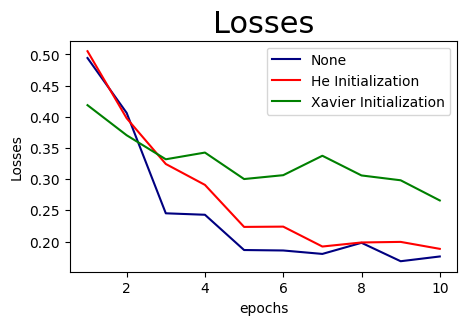

In [13]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'red', label = 'He Initialization')
plt.plot(np.arange(1,11),history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 22)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

In [14]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer='normal', kernel_regularizer = regularizer2, activation='relu'),
    tf.keras.layers.Dense(32,kernel_initializer='normal', kernel_regularizer = regularizer2, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
L2_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
L2_model = L2_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8620 - accuracy: 0.8233 - val_loss: 0.4159 - val_accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3207 - accuracy: 0.9300 - val_loss: 0.2770 - val_accuracy: 0.9402
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2537 - accuracy: 0.9463 - val_loss: 0.2272 - val_accuracy: 0.9504
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2221 - accuracy: 0.9533 - val_loss: 0.2223 - val_accuracy: 0.9532
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2035 - accuracy: 0.9577 - val_loss: 0.2131 - val_accuracy: 0.9574
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1902 - accuracy: 0.9626 - val_loss: 0.2001 - val_accuracy: 0.9588
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1864 - accuracy: 0.9632 - val_loss: 0.2187 - val_accuracy: